# **4. Evaluation Metrics for Classification**

In the previous session we trained a model for predicting churn. How do we know if it's good?

## **4.1 Evaluation metrics: session overview**

In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [304]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [305]:
file_path = r"C:\Users\amirr\MLZoomCamp\ML_ZoomCamp_Projects\WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)

In [306]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)
df.churn = (df.churn == 'yes').astype(int)

In [307]:
df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-resvb,male,0,yes,yes,24,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,yes,mailed_check,84.80,1990.50,0
7039,2234-xaduh,female,0,yes,yes,72,yes,yes,fiber_optic,no,...,yes,no,yes,yes,one_year,yes,credit_card_(automatic),103.20,7362.90,0
7040,4801-jzazl,female,0,yes,yes,11,no,no_phone_service,dsl,yes,...,no,no,no,no,month-to-month,yes,electronic_check,29.60,346.45,0
7041,8361-ltmkd,male,1,yes,no,4,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,mailed_check,74.40,306.60,1


In [308]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [309]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']
categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [310]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\amirr\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [311]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

np.float64(0.8026969481902059)

## **4.2 Accuracy and dummy model**

- Evaluate the model on different thresholds
- Check the accuracy of dummy baselines

In [312]:
len(y_val)

1409

In [313]:
(y_val == churn_decision).sum().item()

1131

In [314]:
1131/1409

0.8026969481902059

In [315]:
from sklearn.metrics import accuracy_score

In [316]:
accuracy_score(y_val, y_pred >= 0.5)

0.8026969481902059

This part evaluates the model's accuracy across different thresholds ranging from 0 to 1 in equal steps of 0.05. It first creates a list of thresholds using np.linspace(0, 1, 21) and initializes an empty list to store accuracy scores. For each threshold, the predicted probabilities (y_pred) are compared with the current threshold, converting them into binary predictions (0 or 1). The accuracy is then calculated by comparing these predictions with the actual values (y_val). The threshold and corresponding accuracy score are printed, and each score is stored in the scores list for further analysis.

In [317]:
thresholds = np.linspace(0, 1, 21) # Generate 21 thresholds between 0 and 1 (inclusive)

scores = [] # Initialize an empty list to store the accuracy scores

for t in thresholds: # Loop through each threshold
    churn_decision= (y_pred >= t)
    score = (y_val == churn_decision).mean()    # Compare predicted probabilities with the current threshold and calculate the accuracy
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.510
0.10 0.595
0.15 0.665
0.20 0.707
0.25 0.737
0.30 0.760
0.35 0.773
0.40 0.784
0.45 0.792
0.50 0.803
0.55 0.800
0.60 0.796
0.65 0.786
0.70 0.765
0.75 0.744
0.80 0.735
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


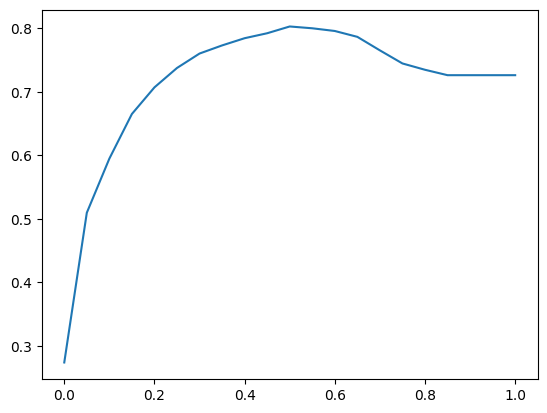

In [318]:
plt.plot(thresholds, scores) # This pattern is typical for many classification models, where an optimal balance is found near a threshold of 0.5.

In [319]:
 from sklearn.metrics import accuracy_score

In [320]:
accuracy_score(y_val, churn_decision)

0.7260468417317246

In [321]:
accuracy_score(y_val, y_pred >=0.5) # this is a funktion in sklean

0.8026969481902059

In [322]:
thresholds = np.linspace(0, 1, 21) # Generate 21 thresholds between 0 and 1 (inclusive)

scores = [] # Initialize an empty list to store the accuracy scores

for t in thresholds: # Loop through each threshold
    accuracy_score(y_val, y_pred >=t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.726
0.05 0.726
0.10 0.726
0.15 0.726
0.20 0.726
0.25 0.726
0.30 0.726
0.35 0.726
0.40 0.726
0.45 0.726
0.50 0.726
0.55 0.726
0.60 0.726
0.65 0.726
0.70 0.726
0.75 0.726
0.80 0.726
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


In [323]:
from collections import Counter

In [324]:
Counter(y_pred>=1.0) # model says no one is going to churn , we dont need to send promotional emails

Counter({np.False_: 1409})

In [325]:
y_val.mean()*100 # churning rate

np.float64(27.395315826827538)

In [326]:
(1-y_val).mean()*100

np.float64(72.60468417317246)

## **4.3 Confusion table**

- Different types of errors and correct decisions
- Arranging them in a table


In [327]:
actual_positive = (y_val==1) 
actual_negative = (y_val==0) 

- actual_positive: Identifies customers who actually churn (y_val == 1).
- actual_negative: Identifies customers who do not churn (y_val == 0).

In [328]:
t = 0.5 # Set a threshold (t) to classify predictions as positive or negative
predict_positive = (y_pred >= t) # predict positive when its above the treshhold 
predict_negative = (y_pred < t) # predict negativr when its below the treshhold 

t = 0.5: A decision threshold to classify predictions.
- predict_positive: Marks cases where the model predicts churn (predicted value >= 0.5).
- predict_negative: Marks cases where the model predicts no churn (predicted value < 0.5).

In [329]:
actual_positive[:5] # True, when customers are going to churn

array([False, False, False,  True, False])

In [330]:
predict_positive[:5]# predict positive when the customer is going to churn 

array([False, False, False,  True, False])

In [331]:
(actual_positive  & predict_positive)[:5] # its is true if and only if both above are true

array([False, False, False,  True, False])

In [332]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

**tp,tn:**
- True Positives (TP): Cases where the customer actually churned and the model correctly predicted churn.
- True Negatives (TN): Cases where the customer did not churn, and the model correctly predicted no churn.

In [333]:
tp, tn

(np.int64(211), np.int64(920))

In [334]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()


**fp, fn:**
- False Positives (FP): The model incorrectly predicts churn, but the customer did not churn.
- False Negatives (FN): The model predicts no churn, but the customer actually churns.

In [335]:
fp, fn

(np.int64(103), np.int64(175))

In [336]:
confusion_matrix = np.array([
    [tn,fp],
    [fn,tp]
])
confusion_matrix

array([[920, 103],
       [175, 211]])

**Confusion Matrix:** This is a table that summarizes the performance of the classification model.

- Row 1: [TP, FP] — True positives and false positives.
- Row 2: [FN, TN] — False negatives and true negatives.

The result is an array that represents the matrix.

### **Insights:**
**<span style="color:green">True Negative (920):**</span> These are the customers who did not churn and were correctly predicted as not churning.

**<span style="color:green">False Positives (103):**</span> These customers did not churn, but we predicted they would. So, we sent them promotions unnecessarily, resulting in wasted marketing spend.

**<span style="color:green">False Negatives (175):**</span> These customers did churn, but weincorrectly predicted that they wouldn’t. We didn't send them any promotions, and they left, leading to a loss of revenue.

**<span style="color:green">True Negatives (211):**</span> These customers did not churn, and we correctly predicted they wouldn’t. No promotion was needed, and no marketing spend was wasted here.

In [337]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

**<span style="color:green">Accuracy: 80% = 65% + 15%**</span>

## **4.4 Precision and Recall**

In [338]:
(tp + tn)/(tp + tn + fp + fn)

np.float64(0.8026969481902059)

In [339]:
p = tp / (tp + fp)
p

np.float64(0.6719745222929936)

In [340]:
tp + fp 

np.int64(314)

The value tp + fp = 314 represents the total number of customers to whom we sent promotional emails because the model predicted that they were likely to churn.
**<span style="color:purple">True Positives (TP = 211):**</span> These customers actually did churn, and the promotional efforts might have been justified to try to retain them.

**<span style="color:purple">False Positives (FP = 103):**</span> These customers did not churn, but the model incorrectly predicted they would. As a result, we sent them promotional emails unnecessarily, leading to a potential waste of marketing budget


In [341]:
r = tp / (tp + fn)
r

np.float64(0.5466321243523317)

In [342]:
tp + fn

np.int64(386)

#### **Interpretation of Model Performance:**

**<span style="color:purple">High Accuracy, Lower Recall:**</span> The model achieves good overall accuracy (80%), but it's missing almost half of the churners (recall of 55%). This could suggest that the model is biased towards predicting the majority class (likely non-churners), especially if the dataset is imbalanced. The model might be playing it "safe" by predicting non-churn more often, as that minimizes the total number of wrong predictions but at the expense of missing true churners.

**<span style="color:purple">Moderate Precision (67%):**</span> The model is somewhat selective in predicting churn (not overly aggressive in identifying churners). This means that when it does predict churn, it's correct about two-thirds of the time. However, the moderate precision also shows there's still room to reduce false positives

## **4.5 ROC Curves**

**TPR and FRP**

In [343]:
tpr = tp / (tp + fn)
tpr

np.float64(0.5466321243523317)

In [344]:
fpr = fp / (fp + tn)
fpr

np.float64(0.10068426197458455)

**False Positive Rate (FPR)**

The **False Positive Rate (FPR)** is a metric used to evaluate the performance of a classification model. It represents the proportion of actual negatives that are incorrectly classified as positives. In the context of a churn prediction model, it indicates the rate at which non-churning customers are mistakenly predicted as churners.

The formula for calculating the False Positive Rate is:
$$ 
\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}} 
$$

Where:
- **FP** = False Positives (the number of non-churners incorrectly predicted as churners)
- **TN** = True Negatives (the number of non-churners correctly predicted as non-churners)

### Interpretation

- A **low FPR** indicates that the model is good at identifying non-churners, resulting in fewer false alarms.
- Conversely, a **high FPR** may suggest that the model is too aggressive in predicting churn, leading to many false positives.


**Provided Information:**
I've calculated an FPR of 0.10068426197458455, which is around 10.07%.
This means that about 10% of non-churners are incorrectly labeled as churners by the model.

In [345]:
scores = []

thresholds = np.linspace(0, 1, 101)
for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [346]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

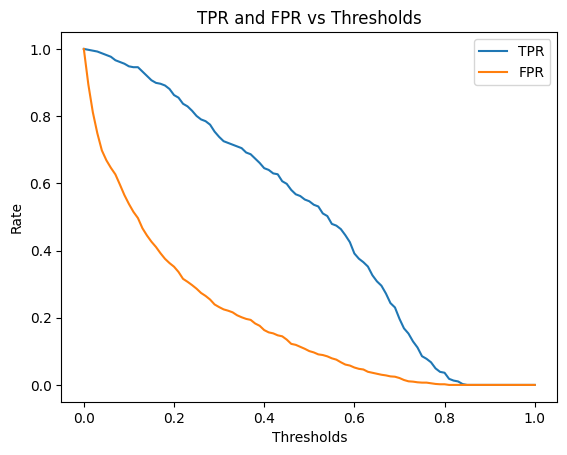

In [347]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')

plt.xlabel('Thresholds')
plt.ylabel('Rate') 
plt.title('TPR and FPR vs Thresholds') 

plt.legend()
plt.show()

#### **Random model**

In [348]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))

In [349]:
y_rand.round(3)

array([0.417, 0.72 , 0.   , ..., 0.774, 0.334, 0.089])

In [350]:
# Accuracy of random model
((y_rand >= 0.5) == y_val).mean()

np.float64(0.5017743080198722)

In [351]:
# write tpr, fpr into dtaframe as previous code, but in a function
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    
    return df_scores

In [352]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

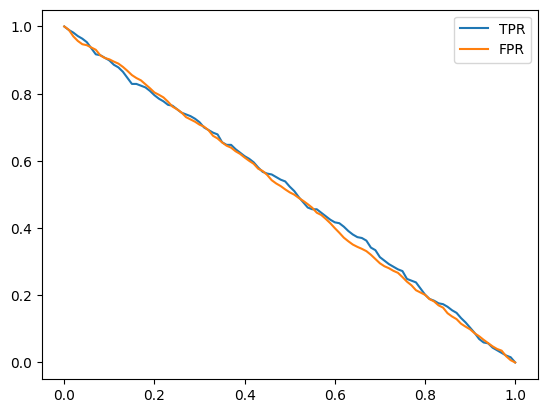

In [353]:
plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')
plt.legend()

### **Ideal model**

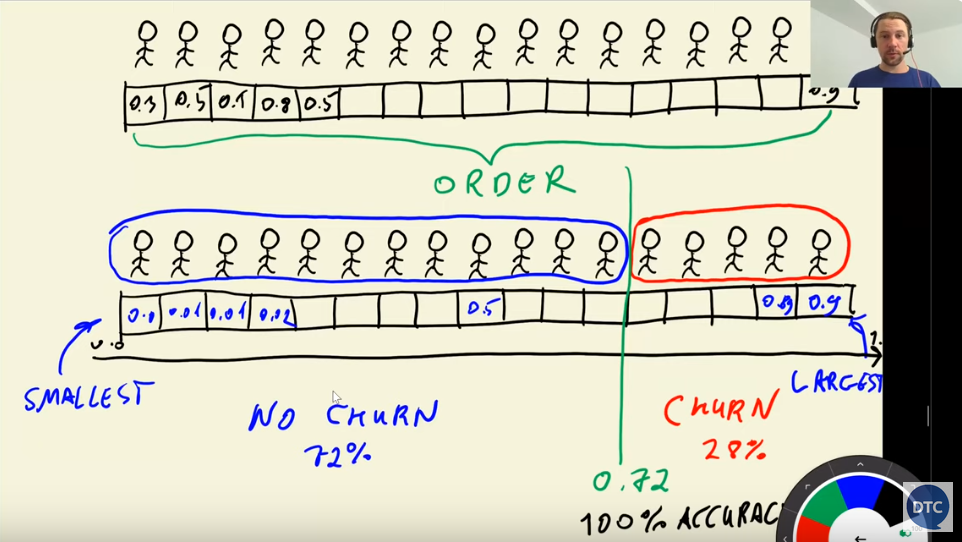

In [354]:
from IPython.display import Image, display
image_path  = r'C:\Users\amirr\MLZoomCamp\ML_ZoomCamp_Projects\Ideal_model.png'
display(Image(filename=image_path, width=400, height=300))

In [355]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(np.int64(1023), np.int64(386))

In [356]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal

y_ideal_pred = np.linspace(0, 1, len(y_val))

In [357]:
1 - y_val.mean()

np.float64(0.7260468417317246)

In [358]:
accuracy_score(y_ideal, y_ideal_pred >= 0.726)

1.0

In [359]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,386,882,0,141,1.000000,0.862170
20,0.2,386,741,0,282,1.000000,0.724340
30,0.3,386,600,0,423,1.000000,0.586510
40,0.4,386,459,0,564,1.000000,0.448680
50,0.5,386,319,0,704,1.000000,0.311828
60,0.6,386,178,0,845,1.000000,0.173998
70,0.7,386,37,0,986,1.000000,0.036168
80,0.8,282,0,104,1023,0.730570,0.000000
90,0.9,141,0,245,1023,0.365285,0.000000


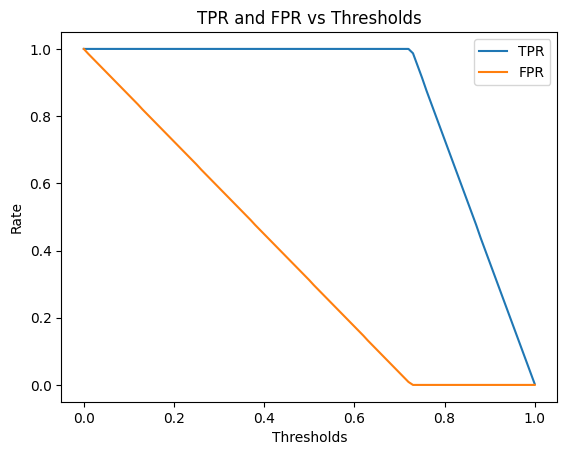

In [360]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR')

plt.xlabel('Thresholds')
plt.ylabel('Rate') 
plt.title('TPR and FPR vs Thresholds') 

plt.legend()
plt.show()

### **Putting everything together**

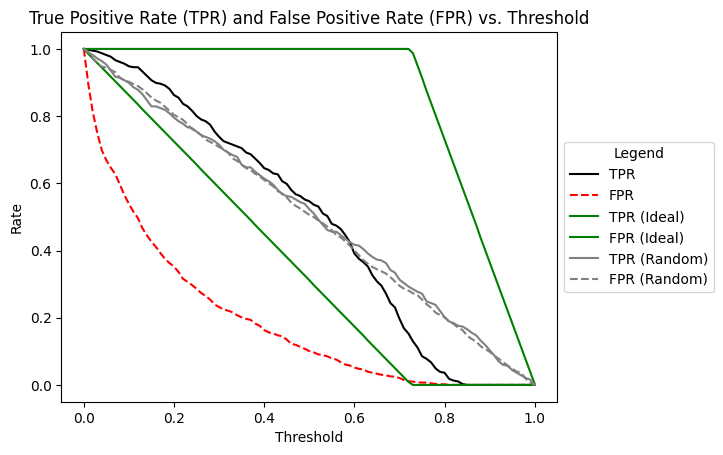

In [361]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR', color='black', linestyle='-', linewidth=1.5)
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR', color='red', linestyle='--', linewidth=1.5)

plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR (Ideal)', color='green', linestyle='-', linewidth=1.5)
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR (Ideal)', color='green', linestyle='-', linewidth=1.5)

plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR (Random)', color='grey', linestyle='-', linewidth=1.5)
plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR (Random)', color='grey', linestyle='--', linewidth=1.5)


plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('True Positive Rate (TPR) and False Positive Rate (FPR) vs. Threshold')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Legend")

plt.show()

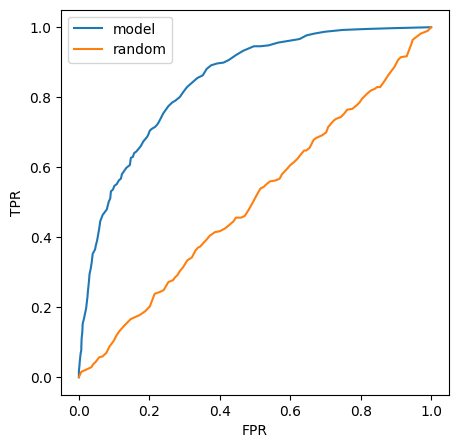

In [362]:
plt.figure(figsize=(5, 5))
plt.plot(df_scores.fpr, df_scores.tpr, label='model')
plt.plot(df_rand.fpr, df_rand.tpr, label='random')
# plt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

we can easily use the **roc_curve** function from sklearn.metrics to calculate the **False Positive Rate (FPR)**, **True Positive Rate (TPR)**, and **thresholds** for different classification threshold values when the ground truth labels (y_val) and predicted probabilities (y_pred). Here's how I calculated and ploted them, including the legend and the adjustments for better readability.

In [363]:
from sklearn.metrics import roc_curve

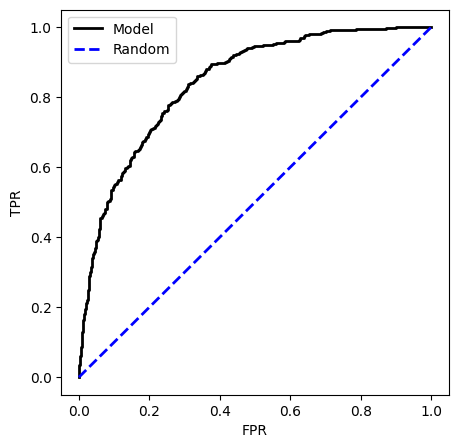

In [364]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label='Model', color='black', linestyle='-', linewidth=2)
plt.plot( [0, 1], [0, 1],label='Random',color='blue', linestyle='--', linewidth=2)

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

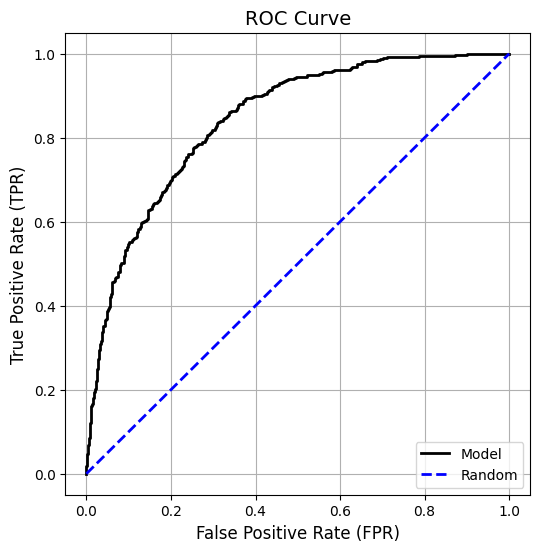

In [365]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

plt.figure(figsize=(6, 6))

# Plotting the ROC curve for your model
plt.plot(fpr, tpr, label='Model', color='black', linestyle='-', linewidth=2)

# Plotting the random classifier's ROC curve (diagonal)
plt.plot([0, 1], [0, 1], label='Random', color='blue', linestyle='--', linewidth=2)

# Adding labels and title
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC Curve', fontsize=14)

plt.legend(loc='lower right', fontsize=10)

# Adding a grid for better readability
plt.grid(True)
plt.show()


## **4.6 ROC AUC**

- Area under the ROC curve - useful metric
- Interpretation of AUC


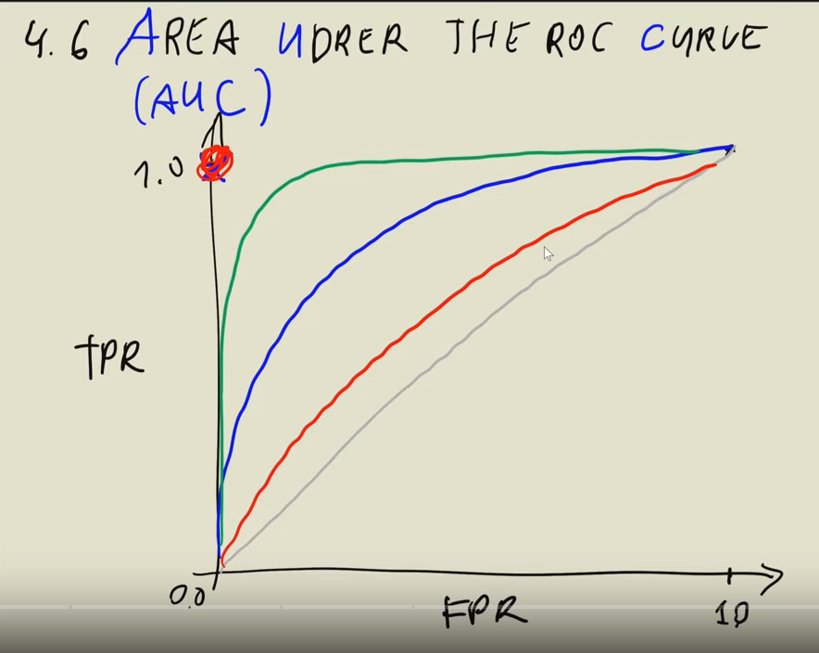

In [366]:
from IPython.display import Image, display
image_path  = r'C:\Users\amirr\MLZoomCamp\ML_ZoomCamp_Projects\ROC_AUC.png'
display(Image(filename=image_path, width=400, height=300))

In [367]:
from sklearn.metrics import auc

In [368]:
auc(fpr, tpr) # Area under the curve

np.float64(0.8438302463039216)

In [369]:
auc(df_scores.fpr, df_scores.tpr)

np.float64(0.8439024204944312)

In [370]:
auc(df_ideal.fpr, df_ideal.tpr) # the AUC of the ideal model is 1 

np.float64(0.9999430203759136)

In [371]:
 fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc(fpr, tpr)

np.float64(0.8438302463039216)

In [372]:
from sklearn.metrics import roc_auc_score

In [373]:
roc_auc_score(y_val, y_pred)

np.float64(0.8438302463039216)

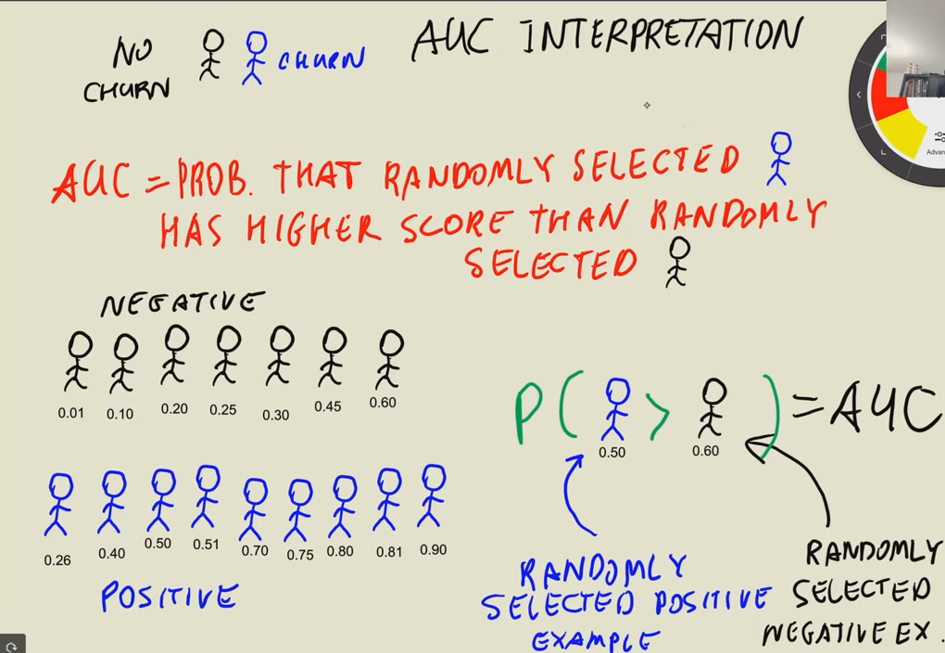

In [374]:
from IPython.display import Image, display
image_path  = r'C:\Users\amirr\MLZoomCamp\ML_ZoomCamp_Projects\ROC_AUC_2.png'
display(Image(filename=image_path, width=400, height=300))

In [375]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [376]:
pos

array([0.54426729, 0.5837765 , 0.46312984, 0.74115717, 0.06495268,
       0.69336618, 0.24773378, 0.6977064 , 0.21561895, 0.66661602,
       0.4739446 , 0.34987162, 0.14871082, 0.61872068, 0.76620171,
       0.14318708, 0.43423799, 0.27443445, 0.07031182, 0.19124929,
       0.67145954, 0.41650554, 0.66403331, 0.58396612, 0.52623805,
       0.4346762 , 0.47045839, 0.35507704, 0.56906283, 0.3223711 ,
       0.63609032, 0.74517564, 0.74019051, 0.6097603 , 0.70962415,
       0.76623145, 0.10710344, 0.18121066, 0.54274643, 0.58201126,
       0.43856531, 0.44221806, 0.75822238, 0.38453001, 0.69568782,
       0.4172432 , 0.75914817, 0.30061629, 0.53552593, 0.58303191,
       0.15389637, 0.53118232, 0.78712938, 0.43698551, 0.67473851,
       0.77556376, 0.01267843, 0.35237294, 0.79860306, 0.58530559,
       0.67572383, 0.24806478, 0.34516727, 0.70336363, 0.20805901,
       0.68685381, 0.63817017, 0.29306312, 0.66243882, 0.30778113,
       0.50276455, 0.27587968, 0.39707597, 0.4121574 , 0.49982

In [377]:
import random
pos_ind = random.randint(0, len(pos) - 1)
neg_ind = random.randint(0, len(neg) - 1)

In [378]:
pos[pos_ind] > neg[neg_ind]

np.False_

In [379]:
n = 100000
success = 0 

for i in range(n):
    pos_ind = random.randint(0, len(pos) - 1)
    neg_ind = random.randint(0, len(neg) - 1)

    if pos[pos_ind] > neg[neg_ind]:
        success = success + 1

success / n

0.84294

**with numpy**

In [380]:
n = 10000
pos_ind = np.random.randint(0, len(pos), size=n)
neg_ind = np.random.randint(0, len(neg), size=n)

In [381]:
pos_ind # 10000 random churnings

array([261, 200,   9, ..., 210, 232, 186], dtype=int32)

In [382]:
neg_ind # 10000 random non churnings

array([246, 705, 964, ..., 996, 121, 332], dtype=int32)

In [383]:
pos[pos_ind]>neg[neg_ind] # scores

array([False,  True,  True, ...,  True,  True,  True])

In [384]:
n = 50000

np.random.seed(1)
pos_ind = np.random.randint(0, len(pos), size=n)
neg_ind = np.random.randint(0, len(neg), size=n)

(pos[pos_ind] > neg[neg_ind]).mean()

np.float64(0.84642)

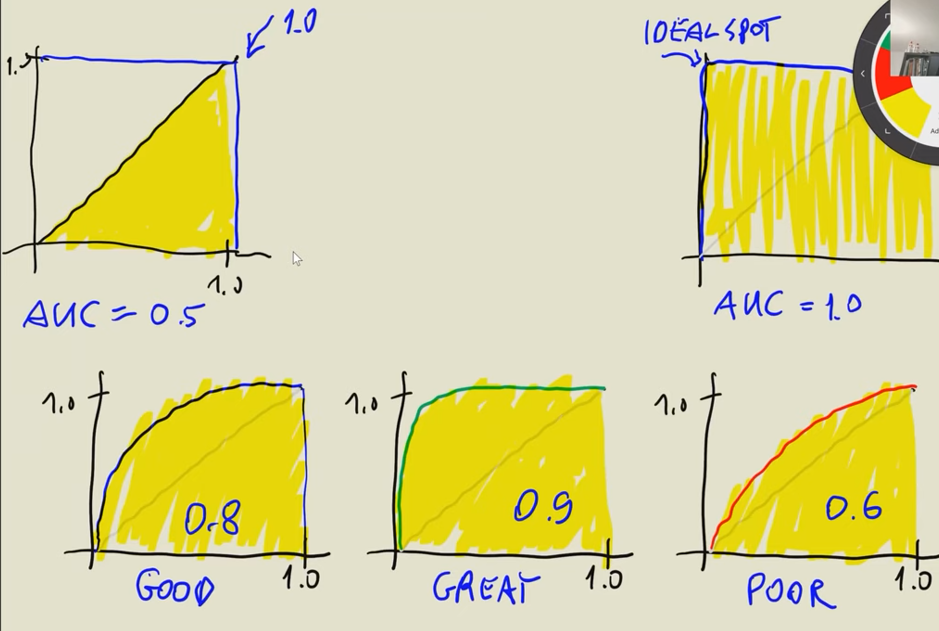

In [385]:
from IPython.display import Image, display
image_path  = r'C:\Users\amirr\MLZoomCamp\ML_ZoomCamp_Projects\ROC_AUC_3.png'
display(Image(filename=image_path, width=400, height=300))

## **4.7 Cross-Validation**
- Evaluating the same model on different subsets of data
- Getting the average prediction and the spread within predictions


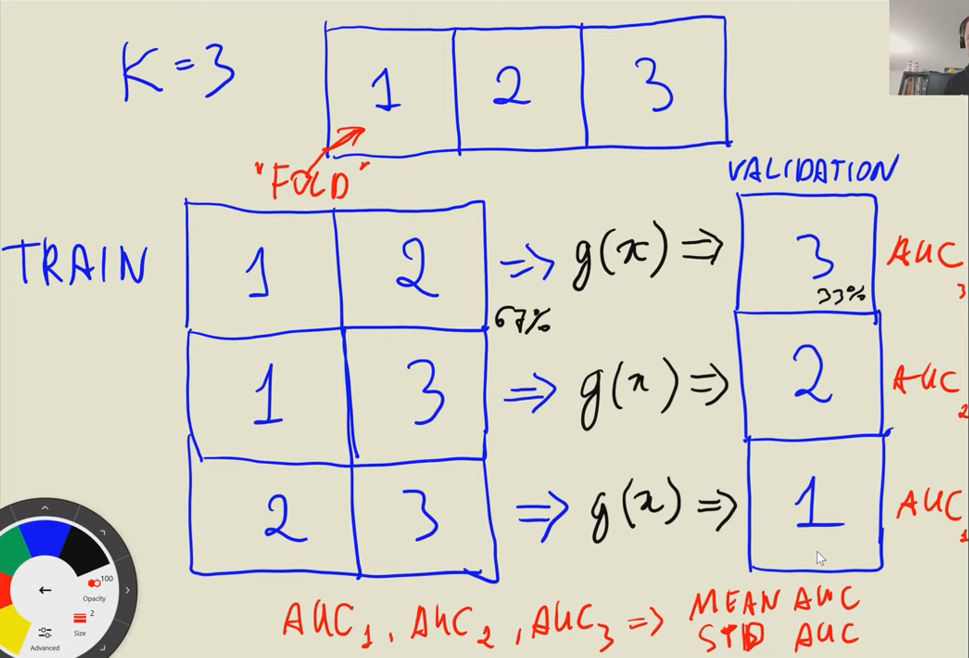

In [386]:
from IPython.display import Image, display
image_path  = r'C:\Users\amirr\MLZoomCamp\ML_ZoomCamp_Projects\Cross_Validation.png'
display(Image(filename=image_path, width=400, height=300))

In [387]:
def train(df_train, y_train, C=1.0):
    dicts= df_train[categorical + numerical].to_dict(orient='records') # Select Features. This format is required for one-hot encoding with DictVectorizer.
    dv = DictVectorizer(sparse=False) # converts categorical features into a numerical format using one-hot encoding.
    #It also keeps the numerical values as they are.
    X_train = dv.fit_transform(dicts)

    model= LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)  # regularization parameter C

    return dv, model


C=0.001: A smaller value for C means stronger regularization, encouraging the model to keep smaller weights and reduce the risk of overfitting.

In [388]:
dv, model = train(df_train, y_train, C=0.001)

In [389]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [390]:
y_pred = predict(df_val, dv, model)

In [391]:
from sklearn.model_selection import KFold

In [392]:
!pip install tqdm

Defaulting to user installation because normal site-packages is not writeable


In [393]:
 kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

In [394]:
next(kfold.split(df_full_train))

(array([   0,    1,    2, ..., 5631, 5632, 5633]),
 array([   4,    5,   11, ..., 5616, 5626, 5629]))

In [395]:
train_idx,val_idx = next(kfold.split(df_full_train))

In [396]:
len(train_idx), len(val_idx), len(df_full_train)

(4507, 1127, 5634)

In [397]:
df_full_train.iloc[train_idx]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1814,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
5946,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
3881,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
2389,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
588,0742-lafqk,male,0,yes,no,72,yes,yes,fiber_optic,yes,...,yes,no,no,yes,two_year,yes,electronic_check,99.15,7422.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,2250-ivbwa,male,0,yes,yes,64,yes,no,fiber_optic,yes,...,no,no,no,no,month-to-month,no,electronic_check,81.05,5135.35,0
5192,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
3980,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
235,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [398]:
from tqdm.auto import tqdm # to see how long eachh iteration take

In [399]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

 14%|████████████                                                                        | 1/7 [00:01<00:08,  1.49s/it]

C=0.001 0.825 +- 0.009


C:\Users\amirr\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\amirr\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

C=0.01 0.840 +- 0.008


C:\Users\amirr\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\amirr\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

C=0.1 0.842 +- 0.007


C:\Users\amirr\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\amirr\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

C=0.5 0.842 +- 0.007


C:\Users\amirr\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\amirr\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

C=1 0.842 +- 0.007


C:\Users\amirr\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\amirr\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

C=5 0.842 +- 0.007


C:\Users\amirr\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\amirr\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

C=10 0.842 +- 0.007


In [400]:
scores

[np.float64(0.8444513348666702),
 np.float64(0.8450474274930472),
 np.float64(0.8333895243829018),
 np.float64(0.8347089435313678),
 np.float64(0.8516872705594427)]

In [404]:
np.mean(scores), np.std(scores)

(np.float64(0.841856900166686), np.float64(0.006875121450792436))

In [406]:
dv, model = train(df_full_train, df_full_train.churn.values, C=1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

C:\Users\amirr\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


np.float64(0.85837612532094)

### **Resulting AUC Score**

- AUC Score: 0.85837612532094

**Interpretation of AUC Score**

- Understanding AUC:
        The AUC score measures the ability of the model to distinguish between the positive class (clients who subscribed) and the negative class (clients who did not).
        The AUC value ranges from 0 to 1:
            An AUC of 0.5 indicates no discriminative ability (equivalent to random guessing).
            An AUC of 1.0 indicates perfect discrimination between the classes.

- Performance Assessment:
        An AUC score of approximately 0.86 is generally considered good. It indicates that the model has a strong ability to differentiate between the two classes.
        This suggests that the model is effective in predicting whether a client will subscribe to a term deposit based on the features provided.

- Implications for Business:
        A high AUC score suggests that the model could be useful in a real-world scenario, such as targeting marketing campaigns effectively.
        Businesses can utilize this model to identify potential customers more likely to subscribe, optimizing resource allocation and improving conversion rates.

**Conclusion**

Overall, the model trained on the dataset demonstrates a strong predictive capability as indicated by the AUC score. Further analysis could include examining the confusion matrix, precision-recall curves, or feature importance to better understand how well the model performs and which features contribute most significantly to its predictions.

## **4.8 Summary**

- Metric - a single number that describes the performance of a model
- Accuracy - fraction of correct answers; sometimes misleading
- Precision and recall are less misleading when we have class inbalance
- ROC Curve - a way to evaluate the performance at all thresholds; okay to use with imbalance
- K-Fold CV - more reliable estimate for performance (mean + std)
